# Importing libraries



In [1]:
import pandas as pd 
import os
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


# Importing CSV

In [2]:
df = pd.read_csv('default.csv');df

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,Male,0,unskilled,14,86,3.0,No,poor,1,personal,2
1,Female,1,skilled,15,94,3.0,No,poor,1,personal,3
2,Male,0,unskilled,16,86,3.0,No,poor,1,personal,2
3,Female,1,skilled,13,94,3.0,No,poor,1,personal,3
4,Male,1,skilled,12,85,3.3,No,poor,1,personal,2
...,...,...,...,...,...,...,...,...,...,...,...
776,Male,0,unskilled,2,46,14.7,Default,critical,0,consumerdurable,0
777,Male,0,unskilled,3,54,14.7,Default,good,0,car,0
778,Male,0,unskilled,3,51,14.8,Default,verygood,0,car,0
779,Male,0,unskilled,3,54,14.8,Default,good,0,car,0


# Basic Info on Table

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         781 non-null    object 
 1   LoanOffered    781 non-null    int64  
 2   Job            781 non-null    object 
 3   WorkExp        781 non-null    int64  
 4   CreditScore    781 non-null    int64  
 5   EMIRatio       781 non-null    float64
 6   Status         781 non-null    object 
 7   CreditHistory  781 non-null    object 
 8   Ownhouse       781 non-null    int64  
 9   Purpose        781 non-null    object 
 10  Dependents     781 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 67.2+ KB


In [4]:
#all categorical variables must have their data type as object.

categorical=[]
numerical=[]
for i in df.columns:
    if df[i].dtype=="object":
        categorical.append(i)
    else:
        numerical.append(i)
print(categorical) 
print(numerical)

    

['Gender', 'Job', 'Status', 'CreditHistory', 'Purpose']
['LoanOffered', 'WorkExp', 'CreditScore', 'EMIRatio', 'Ownhouse', 'Dependents']


In [5]:
df.Job.unique()

array(['unskilled', 'skilled', 'Management'], dtype=object)

In [9]:
df['Job'].value_counts()


skilled       557
Management    119
unskilled     105
Name: Job, dtype: int64

In [7]:
df.Gender.unique()



array(['Male', 'Female'], dtype=object)

In [8]:
df['Gender'].value_counts()

Male      548
Female    233
Name: Gender, dtype: int64

In [9]:
df.Purpose.unique()

array(['personal', 'car', 'education', 'consumerdurable'], dtype=object)

In [10]:
df['Purpose'].value_counts()

consumerdurable    280
car                260
education          125
personal           116
Name: Purpose, dtype: int64

In [11]:
df.CreditHistory.unique()


array(['poor', 'critical', 'good', 'verygood'], dtype=object)

In [12]:
df['CreditHistory'].value_counts()

verygood    265
good        235
critical    184
poor         97
Name: CreditHistory, dtype: int64

In [13]:
df.Status.unique()

array(['No', 'Default'], dtype=object)

In [14]:
df['Status'].value_counts()

No         656
Default    125
Name: Status, dtype: int64

# Label Encoding all categorical variables

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
LE= LabelEncoder()
label =LE.fit_transform(df['Job'])

In [17]:
df = df.drop('Job',axis ='columns');print(df)

     Gender  LoanOffered  WorkExp  CreditScore  EMIRatio   Status  \
0      Male            0       14           86       3.0       No   
1    Female            1       15           94       3.0       No   
2      Male            0       16           86       3.0       No   
3    Female            1       13           94       3.0       No   
4      Male            1       12           85       3.3       No   
..      ...          ...      ...          ...       ...      ...   
776    Male            0        2           46      14.7  Default   
777    Male            0        3           54      14.7  Default   
778    Male            0        3           51      14.8  Default   
779    Male            0        3           54      14.8  Default   
780    Male            0        3           51      14.8  Default   

    CreditHistory  Ownhouse          Purpose  Dependents  
0            poor         1         personal           2  
1            poor         1         personal         

In [18]:
df['Job']=label;print(df)

     Gender  LoanOffered  WorkExp  CreditScore  EMIRatio   Status  \
0      Male            0       14           86       3.0       No   
1    Female            1       15           94       3.0       No   
2      Male            0       16           86       3.0       No   
3    Female            1       13           94       3.0       No   
4      Male            1       12           85       3.3       No   
..      ...          ...      ...          ...       ...      ...   
776    Male            0        2           46      14.7  Default   
777    Male            0        3           54      14.7  Default   
778    Male            0        3           51      14.8  Default   
779    Male            0        3           54      14.8  Default   
780    Male            0        3           51      14.8  Default   

    CreditHistory  Ownhouse          Purpose  Dependents  Job  
0            poor         1         personal           2    2  
1            poor         1         persona

In [19]:
LE= LabelEncoder()
label =LE.fit_transform(df['Gender'])

In [20]:
df = df.drop('Gender',axis ='columns');print(df)

     LoanOffered  WorkExp  CreditScore  EMIRatio   Status CreditHistory  \
0              0       14           86       3.0       No          poor   
1              1       15           94       3.0       No          poor   
2              0       16           86       3.0       No          poor   
3              1       13           94       3.0       No          poor   
4              1       12           85       3.3       No          poor   
..           ...      ...          ...       ...      ...           ...   
776            0        2           46      14.7  Default      critical   
777            0        3           54      14.7  Default          good   
778            0        3           51      14.8  Default      verygood   
779            0        3           54      14.8  Default          good   
780            0        3           51      14.8  Default      verygood   

     Ownhouse          Purpose  Dependents  Job  
0           1         personal           2    2  

In [21]:
df['Gender']=label;print(df)

     LoanOffered  WorkExp  CreditScore  EMIRatio   Status CreditHistory  \
0              0       14           86       3.0       No          poor   
1              1       15           94       3.0       No          poor   
2              0       16           86       3.0       No          poor   
3              1       13           94       3.0       No          poor   
4              1       12           85       3.3       No          poor   
..           ...      ...          ...       ...      ...           ...   
776            0        2           46      14.7  Default      critical   
777            0        3           54      14.7  Default          good   
778            0        3           51      14.8  Default      verygood   
779            0        3           54      14.8  Default          good   
780            0        3           51      14.8  Default      verygood   

     Ownhouse          Purpose  Dependents  Job  Gender  
0           1         personal           

In [22]:
LE= LabelEncoder()
label =LE.fit_transform(df['Purpose'])

In [23]:
df = df.drop('Purpose',axis ='columns');print(df)

     LoanOffered  WorkExp  CreditScore  EMIRatio   Status CreditHistory  \
0              0       14           86       3.0       No          poor   
1              1       15           94       3.0       No          poor   
2              0       16           86       3.0       No          poor   
3              1       13           94       3.0       No          poor   
4              1       12           85       3.3       No          poor   
..           ...      ...          ...       ...      ...           ...   
776            0        2           46      14.7  Default      critical   
777            0        3           54      14.7  Default          good   
778            0        3           51      14.8  Default      verygood   
779            0        3           54      14.8  Default          good   
780            0        3           51      14.8  Default      verygood   

     Ownhouse  Dependents  Job  Gender  
0           1           2    2       1  
1           1    

In [24]:
df['Purpose']=label;print(df)

     LoanOffered  WorkExp  CreditScore  EMIRatio   Status CreditHistory  \
0              0       14           86       3.0       No          poor   
1              1       15           94       3.0       No          poor   
2              0       16           86       3.0       No          poor   
3              1       13           94       3.0       No          poor   
4              1       12           85       3.3       No          poor   
..           ...      ...          ...       ...      ...           ...   
776            0        2           46      14.7  Default      critical   
777            0        3           54      14.7  Default          good   
778            0        3           51      14.8  Default      verygood   
779            0        3           54      14.8  Default          good   
780            0        3           51      14.8  Default      verygood   

     Ownhouse  Dependents  Job  Gender  Purpose  
0           1           2    2       1        3  

In [25]:
LE= LabelEncoder()
label =LE.fit_transform(df['CreditHistory'])

In [26]:
df = df.drop('CreditHistory',axis ='columns');print(df)

     LoanOffered  WorkExp  CreditScore  EMIRatio   Status  Ownhouse  \
0              0       14           86       3.0       No         1   
1              1       15           94       3.0       No         1   
2              0       16           86       3.0       No         1   
3              1       13           94       3.0       No         1   
4              1       12           85       3.3       No         1   
..           ...      ...          ...       ...      ...       ...   
776            0        2           46      14.7  Default         0   
777            0        3           54      14.7  Default         0   
778            0        3           51      14.8  Default         0   
779            0        3           54      14.8  Default         0   
780            0        3           51      14.8  Default         0   

     Dependents  Job  Gender  Purpose  
0             2    2       1        3  
1             3    1       0        3  
2             2    2       

In [27]:
df['CreditHistory']=label;print(df)

     LoanOffered  WorkExp  CreditScore  EMIRatio   Status  Ownhouse  \
0              0       14           86       3.0       No         1   
1              1       15           94       3.0       No         1   
2              0       16           86       3.0       No         1   
3              1       13           94       3.0       No         1   
4              1       12           85       3.3       No         1   
..           ...      ...          ...       ...      ...       ...   
776            0        2           46      14.7  Default         0   
777            0        3           54      14.7  Default         0   
778            0        3           51      14.8  Default         0   
779            0        3           54      14.8  Default         0   
780            0        3           51      14.8  Default         0   

     Dependents  Job  Gender  Purpose  CreditHistory  
0             2    2       1        3              2  
1             3    1       0        3

In [28]:
LE= LabelEncoder()
label =LE.fit_transform(df['Status'])

In [29]:
df = df.drop('Status',axis ='columns');print(df)

     LoanOffered  WorkExp  CreditScore  EMIRatio  Ownhouse  Dependents  Job  \
0              0       14           86       3.0         1           2    2   
1              1       15           94       3.0         1           3    1   
2              0       16           86       3.0         1           2    2   
3              1       13           94       3.0         1           3    1   
4              1       12           85       3.3         1           2    1   
..           ...      ...          ...       ...       ...         ...  ...   
776            0        2           46      14.7         0           0    2   
777            0        3           54      14.7         0           0    2   
778            0        3           51      14.8         0           0    2   
779            0        3           54      14.8         0           0    2   
780            0        3           51      14.8         0           0    2   

     Gender  Purpose  CreditHistory  
0         1  

In [30]:
df['Status']=label;print(df)

     LoanOffered  WorkExp  CreditScore  EMIRatio  Ownhouse  Dependents  Job  \
0              0       14           86       3.0         1           2    2   
1              1       15           94       3.0         1           3    1   
2              0       16           86       3.0         1           2    2   
3              1       13           94       3.0         1           3    1   
4              1       12           85       3.3         1           2    1   
..           ...      ...          ...       ...       ...         ...  ...   
776            0        2           46      14.7         0           0    2   
777            0        3           54      14.7         0           0    2   
778            0        3           51      14.8         0           0    2   
779            0        3           54      14.8         0           0    2   
780            0        3           51      14.8         0           0    2   

     Gender  Purpose  CreditHistory  Status  
0    

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LoanOffered    781 non-null    int64  
 1   WorkExp        781 non-null    int64  
 2   CreditScore    781 non-null    int64  
 3   EMIRatio       781 non-null    float64
 4   Ownhouse       781 non-null    int64  
 5   Dependents     781 non-null    int64  
 6   Job            781 non-null    int32  
 7   Gender         781 non-null    int32  
 8   Purpose        781 non-null    int32  
 9   CreditHistory  781 non-null    int32  
 10  Status         781 non-null    int32  
dtypes: float64(1), int32(5), int64(5)
memory usage: 52.0 KB


# All categorical variables are have been encoded.  

In [32]:
df

,LoanOffered,WorkExp,CreditScore,EMIRatio,Ownhouse,Dependents,Job,Gender,Purpose,CreditHistory,Status
0,0,14,86,3.0,1,2,2,1,3,2,1
1,1,15,94,3.0,1,3,1,0,3,2,1
2,0,16,86,3.0,1,2,2,1,3,2,1
3,1,13,94,3.0,1,3,1,0,3,2,1
4,1,12,85,3.3,1,2,1,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
776,0,2,46,14.7,0,0,2,1,1,0,0
777,0,3,54,14.7,0,0,2,1,0,1,0
778,0,3,51,14.8,0,0,2,1,0,3,0
779,0,3,54,14.8,0,0,2,1,0,1,0


In [33]:
#Checking for missing data
df.isnull().sum()

LoanOffered      0
WorkExp          0
CreditScore      0
EMIRatio         0
Ownhouse         0
Dependents       0
Job              0
Gender           0
Purpose          0
CreditHistory    0
Status           0
dtype: int64

In [34]:
#checking for duplicated rows

dupss = df.duplicated()
print('Number of duplicate rows = %d' % (dupss.sum()))

df[dupss]


Number of duplicate rows = 13


,LoanOffered,WorkExp,CreditScore,EMIRatio,Ownhouse,Dependents,Job,Gender,Purpose,CreditHistory,Status
25,1,15,87,4.6,1,0,1,1,3,0,1
26,1,15,90,4.6,1,3,1,0,3,0,1
99,1,11,80,6.3,1,3,1,0,2,0,1
320,1,14,92,8.8,1,2,1,1,1,1,1
336,1,11,85,9.1,1,1,0,1,1,1,1
411,1,10,82,10.0,1,3,0,1,0,3,1
460,1,11,84,10.5,1,2,1,1,0,3,1
648,1,4,52,14.4,1,1,1,1,0,3,1
670,0,5,57,8.2,0,1,2,1,2,2,0
700,0,8,74,10.4,0,0,2,1,1,0,0


In [35]:
#removing duplcated rows so that there is less redundancy. 
df=df.drop_duplicates()

<AxesSubplot:>

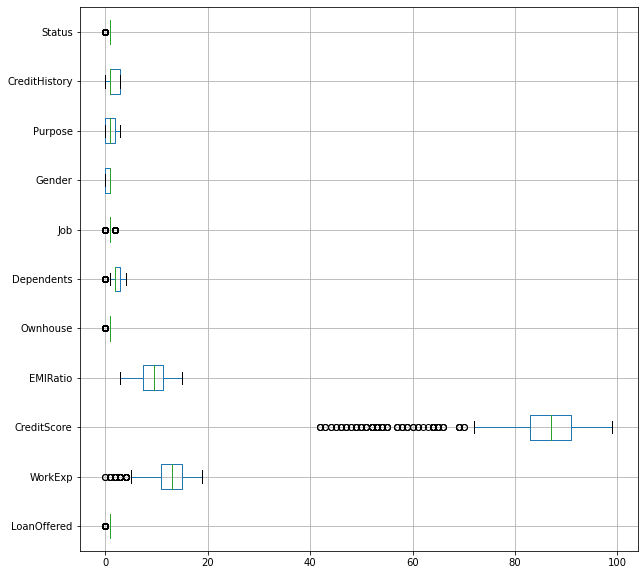

In [36]:
#checking for outliers with box plot
plt.figure(figsize=(10,10))
df.boxplot(vert=0)

<AxesSubplot:>

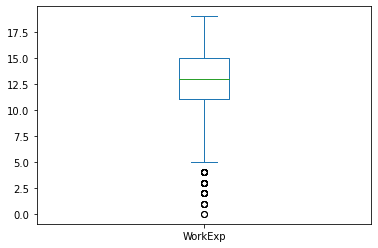

In [37]:
df.WorkExp.plot.box()
#workexp has some outliers

<AxesSubplot:>

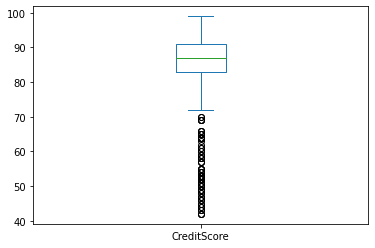

In [38]:
df.CreditScore.plot.box()
#credit score has some outliers

In [39]:
#treating outliers
import numpy as np
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [40]:
for column in df.iloc[:, 1:3].columns:
    lr,ur=treat_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

C:\Users\ashok\AppData\Local\Temp/ipykernel_9688/2969721251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=np.where(df[column]>ur,ur,df[column])
C:\Users\ashok\AppData\Local\Temp/ipykernel_9688/2969721251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=np.where(df[column]<lr,lr,df[column])


<AxesSubplot:>

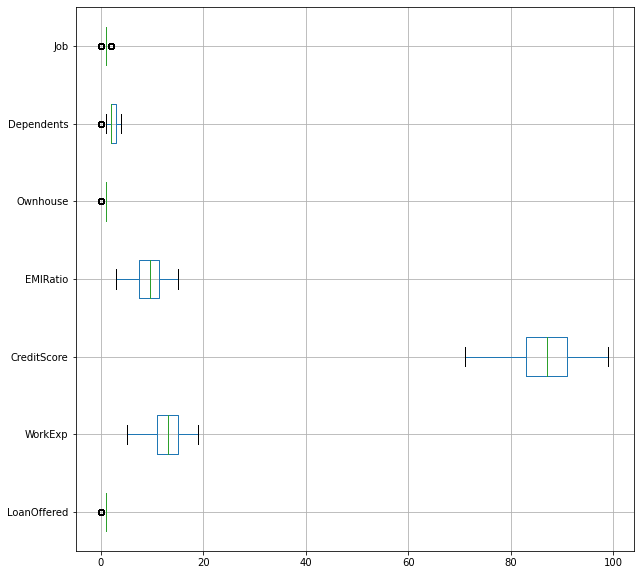

In [41]:
plt.figure(figsize=(10,10))
df.iloc[:, 0:7].boxplot(vert=0)

<AxesSubplot:>

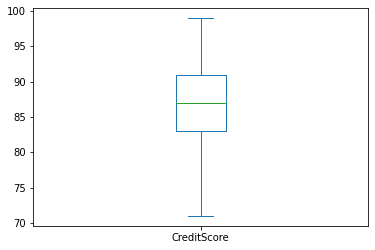

In [42]:
df.CreditScore.plot.box()

<AxesSubplot:>

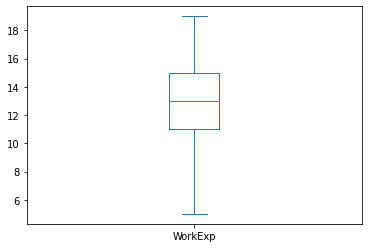

In [43]:
df.WorkExp.plot.box()

In [44]:
#outliers in the data have been treated.

# Exploratory Data Analysis

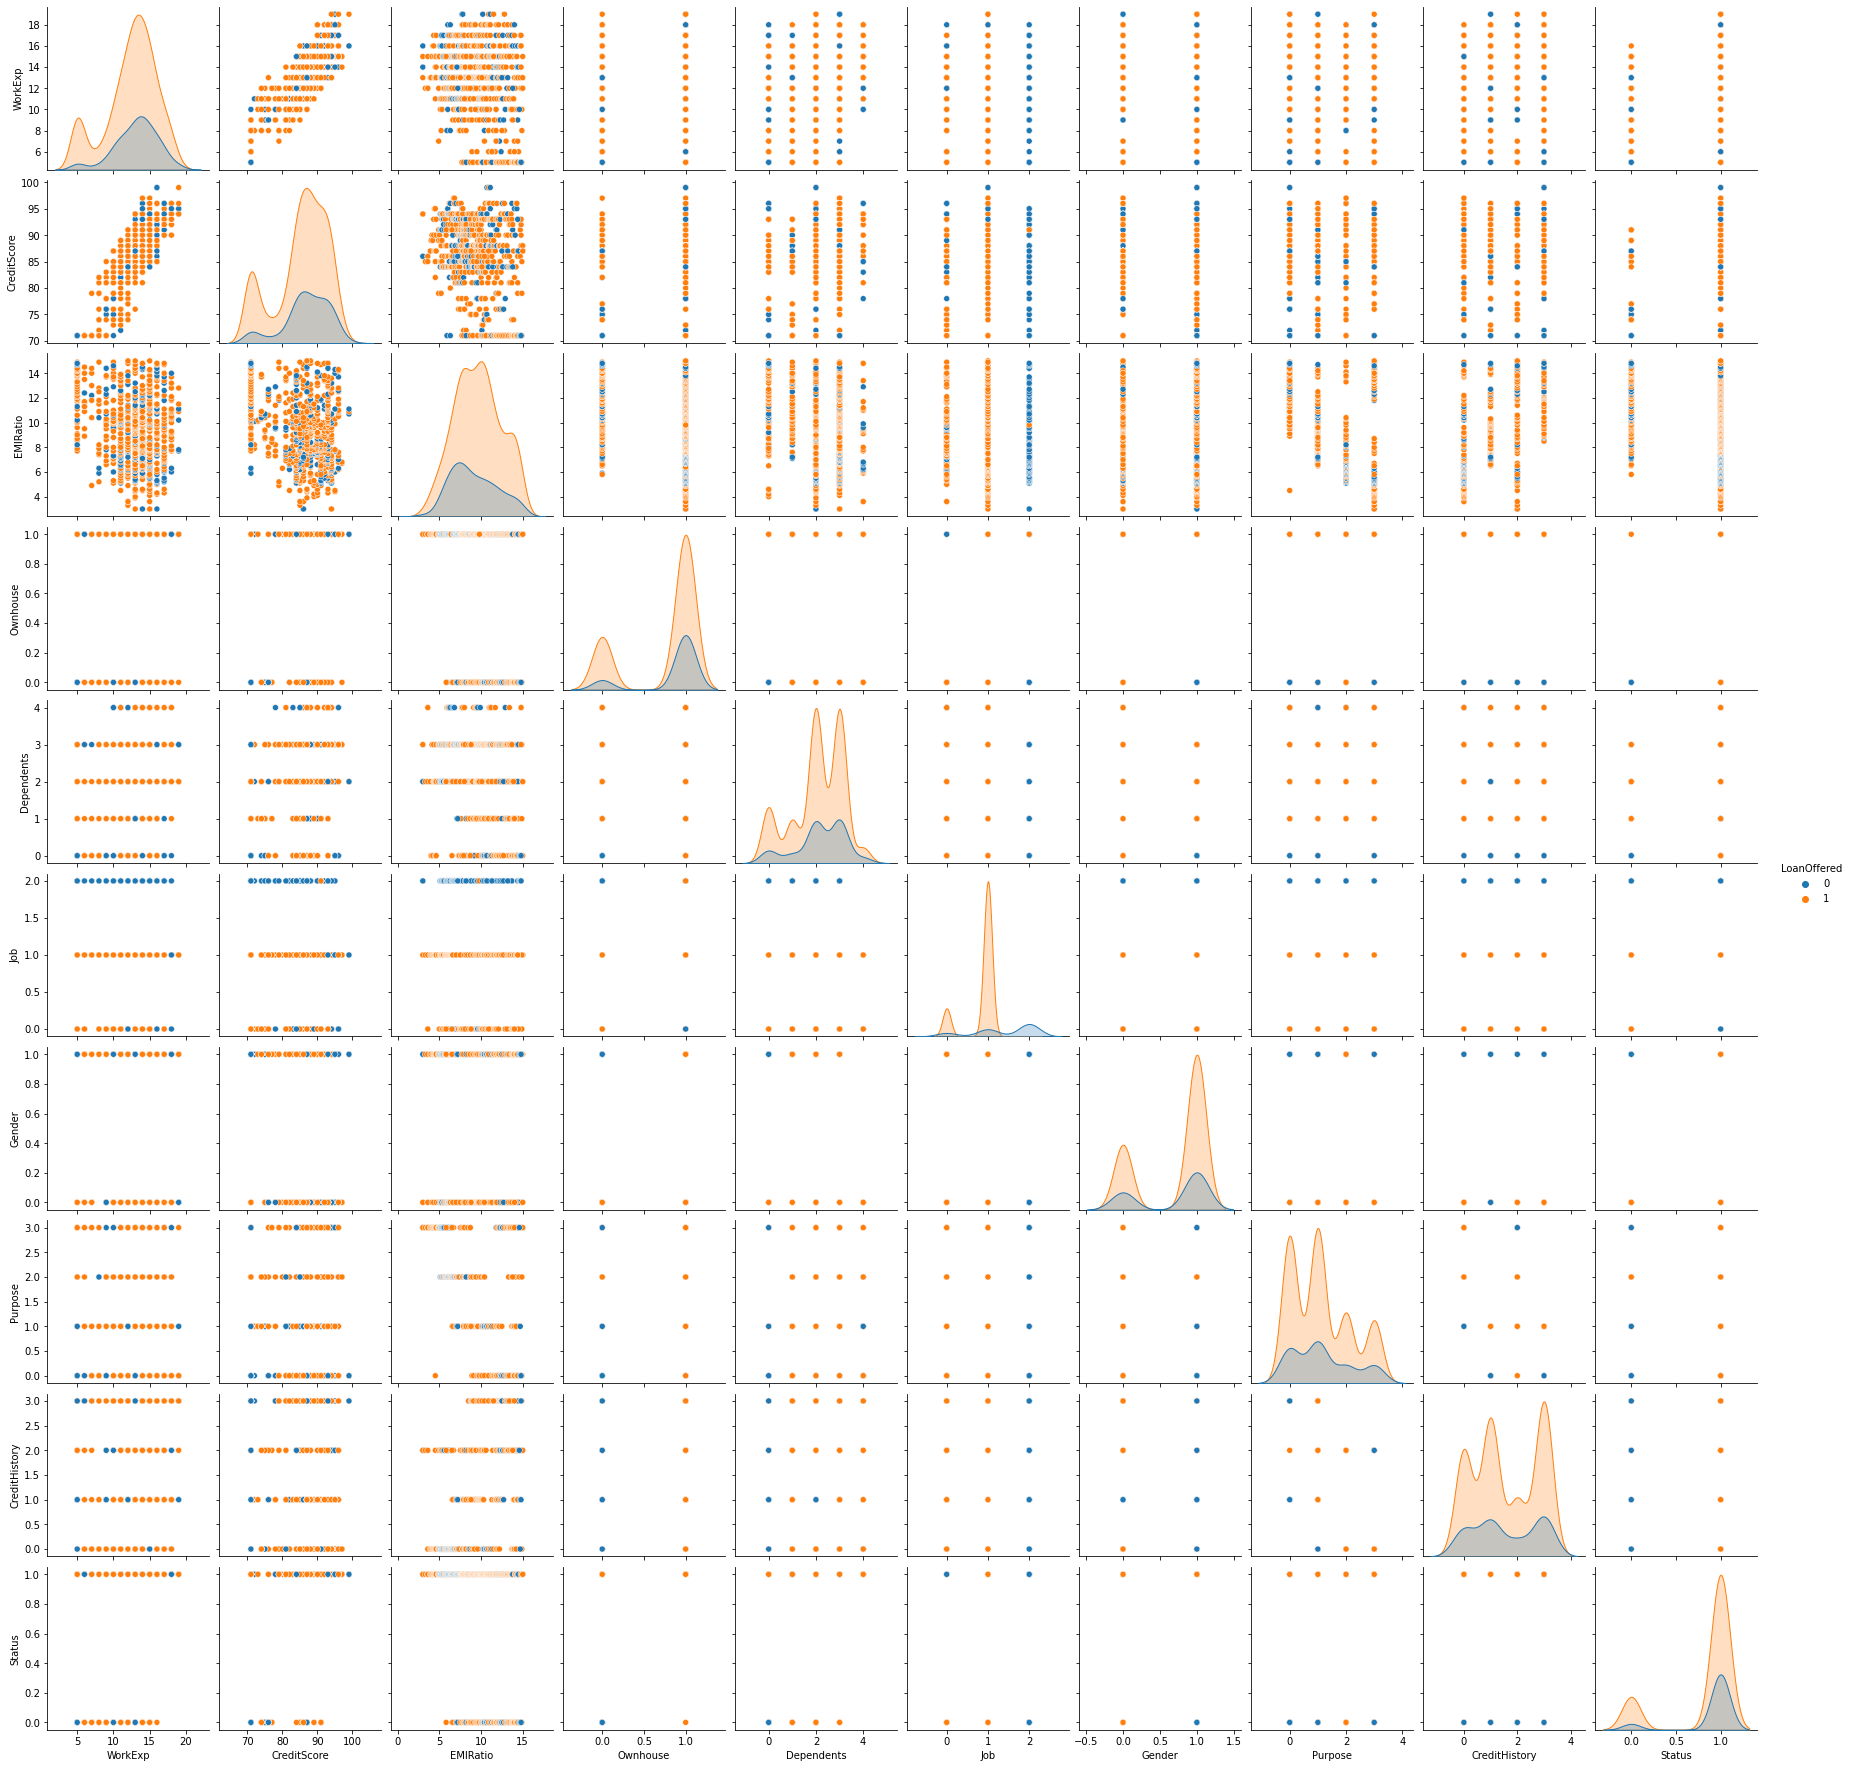

In [51]:

sns.pairplot(data = df, hue = 'LoanOffered')

In [52]:
df.corr()

,LoanOffered,WorkExp,CreditScore,EMIRatio,Ownhouse,Dependents,Job,Gender,Purpose,CreditHistory,Status
LoanOffered,1.000000,-0.091060,-0.088078,0.067800,-0.105760,-0.043235,-0.433177,0.020245,-0.022768,-0.001752,-0.092602
WorkExp,-0.091060,1.000000,0.894020,-0.261985,0.388834,0.374840,0.112605,-0.074679,0.030242,0.094651,0.530447
CreditScore,-0.088078,0.894020,1.000000,-0.313799,0.434908,0.412859,0.087440,-0.077935,0.049508,0.066906,0.601428
EMIRatio,0.067800,-0.261985,-0.313799,1.000000,-0.212028,-0.244157,-0.026785,0.037242,-0.405319,0.549074,-0.304838
Ownhouse,-0.105760,0.388834,0.434908,-0.212028,1.000000,0.365221,0.007759,-0.026599,-0.035934,0.080398,0.780705
Dependents,-0.043235,0.374840,0.412859,-0.244157,0.365221,1.000000,-0.190268,-0.500216,-0.062041,0.085105,0.509386
Job,-0.433177,0.112605,0.087440,-0.026785,0.007759,-0.190268,1.000000,-0.036333,0.030733,0.021042,0.037048
Gender,0.020245,-0.074679,-0.077935,0.037242,-0.026599,-0.500216,-0.036333,1.000000,-0.099142,0.043441,-0.047651
Purpose,-0.022768,0.030242,0.049508,-0.405319,-0.035934,-0.062041,0.030733,-0.099142,1.000000,-0.570845,-0.013865
CreditHistory,-0.001752,0.094651,0.066906,0.549074,0.080398,0.085105,0.021042,0.043441,-0.570845,1.000000,0.077828


<AxesSubplot:>

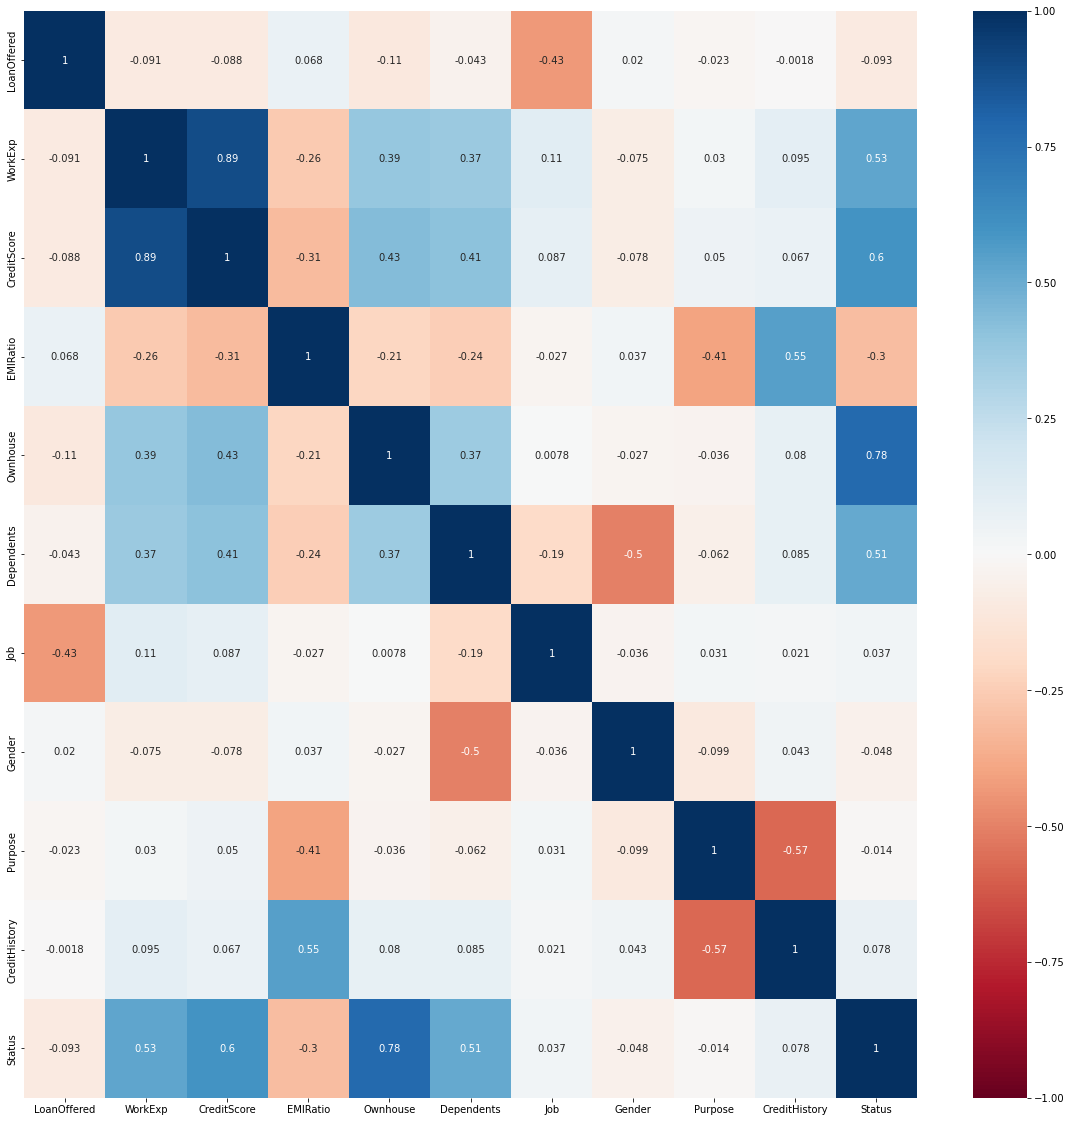

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), vmin = -1, cmap = 'RdBu' , annot = True)


In [48]:
numerical #numerical data variables

['LoanOffered', 'WorkExp', 'CreditScore', 'EMIRatio', 'Ownhouse', 'Dependents']

C:\Users\ashok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashok\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ashok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and 

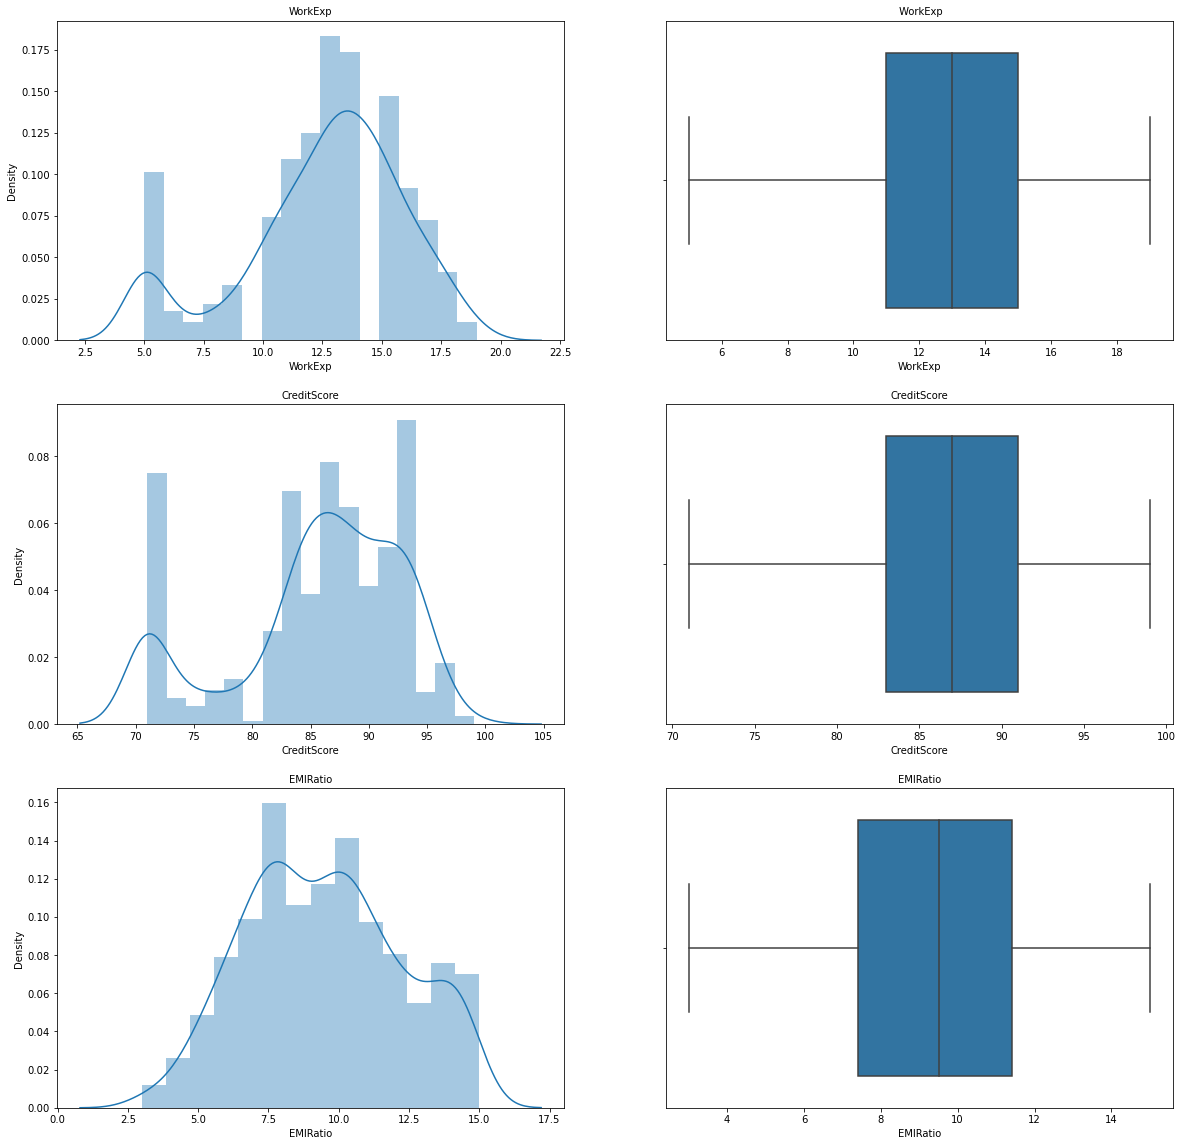

In [59]:

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,20)

a = sns.distplot(df['WorkExp'] , ax=axes[0][0])
a.set_title("WorkExp",fontsize=10)

a = sns.boxplot(df['WorkExp'] , orient = "v" , ax=axes[0][1])
a.set_title(" WorkExp",fontsize=10)

a = sns.distplot(df['CreditScore'] , ax=axes[1][0])
a.set_title("CreditScore",fontsize=10)

a = sns.boxplot(df['CreditScore'] , orient = "v" , ax=axes[1][1])
a.set_title("CreditScore",fontsize=10)


a = sns.distplot(df['EMIRatio'] , ax=axes[2][0])
a.set_title("EMIRatio",fontsize=10)

a = sns.boxplot(df['EMIRatio'] , orient = "v" , ax=axes[2][1])
a.set_title("EMIRatio",fontsize=10)




plt.show()


<AxesSubplot:xlabel='LoanOffered', ylabel='WorkExp'>

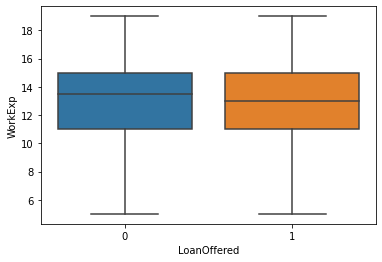

In [50]:
#multivariate analysis

sns.boxplot(data = df, x = "LoanOffered", y = "WorkExp")

<AxesSubplot:xlabel='LoanOffered', ylabel='CreditScore'>

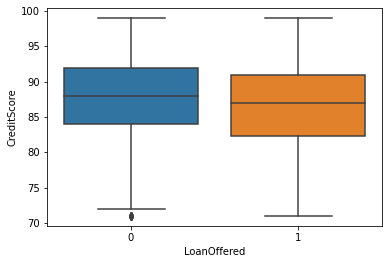

In [51]:
sns.boxplot(data = df, x = "LoanOffered", y = "CreditScore")

# Comparing for Categorical Variables

<AxesSubplot:xlabel='LoanOffered', ylabel='count'>

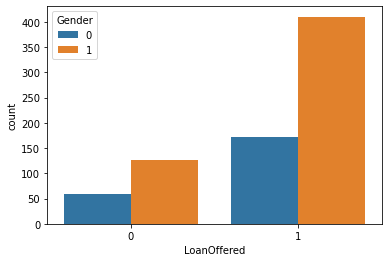

In [52]:

sns.countplot(data = df , x = 'LoanOffered' , hue = 'Gender')
#1 is male and 0 is female

<AxesSubplot:xlabel='LoanOffered', ylabel='count'>

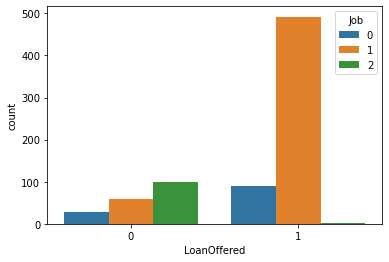

In [53]:
sns.countplot(data = df , x = 'LoanOffered' , hue = 'Job')
#0 skilled, 1 management , 2 unskilled

<AxesSubplot:xlabel='LoanOffered', ylabel='count'>

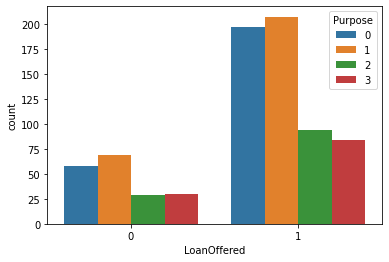

In [54]:
sns.countplot(data = df , x = 'LoanOffered' , hue = 'Purpose')
# 0-consume durable, 1-car, 2-education, 3-personal

<AxesSubplot:xlabel='LoanOffered', ylabel='count'>

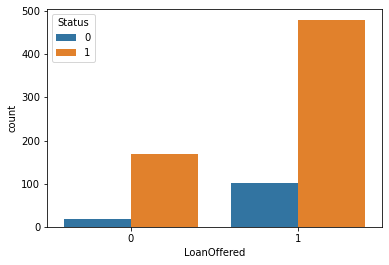

In [55]:
sns.countplot(data = df , x = 'LoanOffered' , hue = 'Status')
#0-no, #1-default

<AxesSubplot:xlabel='LoanOffered', ylabel='count'>

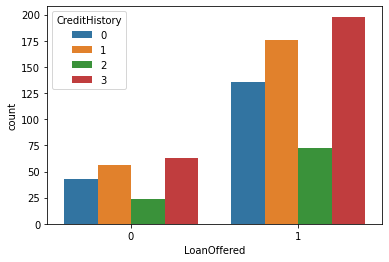

In [56]:
sns.countplot(data = df , x = 'LoanOffered' , hue = 'CreditHistory')
#0-verygood, 1-good, 2-critical, 3-poor

# Comparing for Continous variables

C:\Users\ashok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


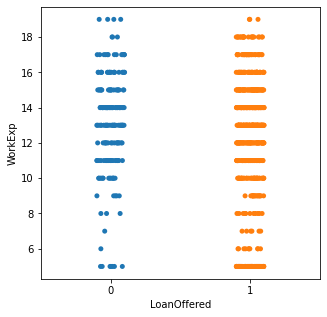

In [109]:

plt.figure(figsize=(5,5))
sns.stripplot(df["LoanOffered"], df['WorkExp'], jitter=True) 
plt.show()


C:\Users\ashok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


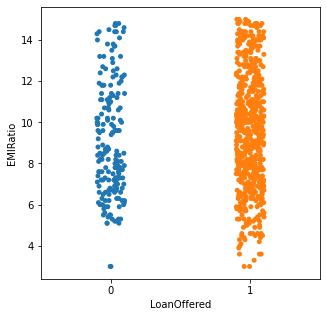

In [108]:
plt.figure(figsize=(5,5))
sns.stripplot(df["LoanOffered"], df['EMIRatio'], jitter=True) 
plt.show()

# Decision Trees Algorithm

In [62]:

#split data set


X = df.drop('LoanOffered', axis=1)


y = df['LoanOffered']

In [63]:
X.head()

,WorkExp,CreditScore,EMIRatio,Ownhouse,Dependents,Job,Gender,Purpose,CreditHistory,Status
0,14.0,86.0,3.0,1,2,2,1,3,2,1
1,15.0,94.0,3.0,1,3,1,0,3,2,1
2,16.0,86.0,3.0,1,2,2,1,3,2,1
3,13.0,94.0,3.0,1,3,1,0,3,2,1
4,12.0,85.0,3.3,1,2,1,1,3,2,1


In [64]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: LoanOffered, dtype: int64

In [65]:
# Split x and y into 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=123)

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier()

dt1.fit(X_train,y_train)

train_pred = dt1.predict(X_train)
test_pred = dt1.predict(X_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('On training data\n',classification_report(y_train,train_pred))

print('On test data \n',classification_report(y_test,test_pred))

On training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       430

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

On test data 
               precision    recall  f1-score   support

           0       0.57      0.70      0.63        40
           1       0.92      0.86      0.89       152

    accuracy                           0.83       192
   macro avg       0.74      0.78      0.76       192
weighted avg       0.84      0.83      0.83       192



In [68]:
from sklearn.tree import DecisionTreeClassifier

dt2 = DecisionTreeClassifier(max_depth = 8)

dt2.fit(X_train,y_train)

train_pred = dt2.predict(X_train)
test_pred = dt2.predict(X_test)

print('On training data\n',classification_report(y_train,train_pred))
print('On test data\n',classification_report(y_test,test_pred))

On training data
               precision    recall  f1-score   support

           0       0.93      0.79      0.86       146
           1       0.93      0.98      0.96       430

    accuracy                           0.93       576
   macro avg       0.93      0.89      0.91       576
weighted avg       0.93      0.93      0.93       576

On test data
               precision    recall  f1-score   support

           0       0.68      0.65      0.67        40
           1       0.91      0.92      0.92       152

    accuracy                           0.86       192
   macro avg       0.80      0.79      0.79       192
weighted avg       0.86      0.86      0.86       192



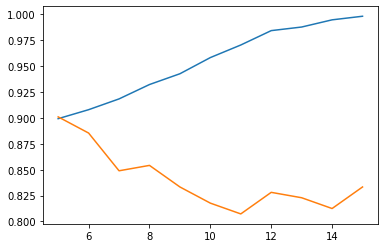

In [69]:
train_accuracy = []
test_accuracy = []

for i in range(5,16):
    dt2 = DecisionTreeClassifier(max_depth = i)
    dt2.fit(X_train,y_train)
    train_pred = dt2.predict(X_train)
    test_pred = dt2.predict(X_test)
    train_accuracy.append(accuracy_score(y_train,train_pred))
    test_accuracy.append(accuracy_score(y_test,test_pred))

plt.plot(range(5,16), train_accuracy)
plt.plot(range(5,16), test_accuracy)


In [70]:
from pandas import DataFrame
aa=confusion_matrix(test_pred,y_test)
df1=DataFrame(aa,index=('Actual_0', 'Actual_1'),columns=('Predicted_0','Predicted_1'))
df1

,Predicted_0,Predicted_1
Actual_0,27,19
Actual_1,13,133


# Gradient boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=123)
gbcl = gbcl.fit(X_train, y_train)

In [72]:
# Performance on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print('model score is:',model_score)
print('confusion matrix:\n',confusion_matrix(y_train, y_train_predict))
print('On training dataset:\n',classification_report(y_train, y_train_predict))

model score is: 0.9357638888888888
confusion matrix:
 [[111  35]
 [  2 428]]
On training dataset:
               precision    recall  f1-score   support

           0       0.98      0.76      0.86       146
           1       0.92      1.00      0.96       430

    accuracy                           0.94       576
   macro avg       0.95      0.88      0.91       576
weighted avg       0.94      0.94      0.93       576



In [73]:
# Performance  on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print('model score:',model_score)
print('confusion matrix:\n',confusion_matrix(y_test, y_test_predict))
print('On test dataset:\n',classification_report(y_test, y_test_predict))

model score: 0.8645833333333334
confusion matrix:
 [[ 22  18]
 [  8 144]]
On test dataset:
               precision    recall  f1-score   support

           0       0.73      0.55      0.63        40
           1       0.89      0.95      0.92       152

    accuracy                           0.86       192
   macro avg       0.81      0.75      0.77       192
weighted avg       0.86      0.86      0.86       192



# ADA boosting

In [74]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=123)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=123)

In [77]:
# Performance on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print('model score:\n',model_score)
print('confusion matrix:\n',confusion_matrix(y_train, y_train_predict))
print('On training dataset:',classification_report(y_train, y_train_predict))

model score:
 0.9097222222222222
confusion matrix:
 [[102  44]
 [  8 422]]
On training dataset:               precision    recall  f1-score   support

           0       0.93      0.70      0.80       146
           1       0.91      0.98      0.94       430

    accuracy                           0.91       576
   macro avg       0.92      0.84      0.87       576
weighted avg       0.91      0.91      0.91       576



In [81]:
# Performance on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print('model score:/n',model_score)
print('confusion matrix: \n',confusion_matrix(y_test, y_test_predict))
print('On test dataset:\n',classification_report(y_test, y_test_predict))

model score:/n 0.859375
confusion matrix: 
 [[ 22  18]
 [  9 143]]
On test dataset:
               precision    recall  f1-score   support

           0       0.71      0.55      0.62        40
           1       0.89      0.94      0.91       152

    accuracy                           0.86       192
   macro avg       0.80      0.75      0.77       192
weighted avg       0.85      0.86      0.85       192



# KNN Model

In [82]:
#why perform knn? It is a model memorizes the training instances and uses them to classify new 
# instances. It works good for noisy data and gives smoother decision boundaries. 
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [87]:
# Performance on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print('model score:',model_score)
print('confusion matrix:\n',confusion_matrix(y_train, y_train_predict))
print('On training dataset:\n',classification_report(y_train, y_train_predict))

model score: 0.8072916666666666
confusion matrix:
 [[ 51  95]
 [ 16 414]]
On training dataset:
               precision    recall  f1-score   support

           0       0.76      0.35      0.48       146
           1       0.81      0.96      0.88       430

    accuracy                           0.81       576
   macro avg       0.79      0.66      0.68       576
weighted avg       0.80      0.81      0.78       576



In [92]:
#Performance on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print('model score:',model_score)
print('confusion matrix:\n',confusion_matrix(y_test, y_test_predict))
print('On test dataset:\n',classification_report(y_test, y_test_predict))

model score: 0.765625
confusion matrix:
 [[  8  32]
 [ 13 139]]
On test dataset:
               precision    recall  f1-score   support

           0       0.38      0.20      0.26        40
           1       0.81      0.91      0.86       152

    accuracy                           0.77       192
   macro avg       0.60      0.56      0.56       192
weighted avg       0.72      0.77      0.74       192



# Random forest 

In [91]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=123)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [93]:
#Performance on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print('model score:',model_score)
print('confusion matrix:\n',confusion_matrix(y_train, y_train_predict))
print('On training dataset:\n',classification_report(y_train, y_train_predict))

model score: 1.0
confusion matrix:
 [[146   0]
 [  0 430]]
On training dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       430

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [98]:
#Performance on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print('model score:',model_score)
print('confusion matrix:\n',confusion_matrix(y_test, y_test_predict))
print('On testing dataset:\n',classification_report(y_test, y_test_predict))

model score: 0.8854166666666666
confusion matrix:
 [[ 26  14]
 [  8 144]]
On testing dataset:
               precision    recall  f1-score   support

           0       0.76      0.65      0.70        40
           1       0.91      0.95      0.93       152

    accuracy                           0.89       192
   macro avg       0.84      0.80      0.82       192
weighted avg       0.88      0.89      0.88       192



# Bagging Method 

In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=123)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=123)

In [103]:
# Performance  on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print('model score:',model_score)
print('confusion matrix:\n',confusion_matrix(y_train, y_train_predict))
print('On training dataset:\n',classification_report(y_train, y_train_predict))

model score: 1.0
confusion matrix:
 [[146   0]
 [  0 430]]
On training dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       430

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [105]:
# Performance on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print('model score:',model_score)
print('confusion matrix:\n',confusion_matrix(y_test, y_test_predict))
print('On testing dataset:\n',classification_report(y_test, y_test_predict))

model score: 0.875
confusion matrix:
 [[ 26  14]
 [ 10 142]]
On testing dataset:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68        40
           1       0.91      0.93      0.92       152

    accuracy                           0.88       192
   macro avg       0.82      0.79      0.80       192
weighted avg       0.87      0.88      0.87       192



In [ ]:
#model score is highest in gradient boosting. 